In [1]:
import numpy as np
import pandas as pd

In [200]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses.csv')

In [84]:
df.head()

,Period,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,...,Electric Savings,Borough,Latitude,Longitude,Community Board,Council District,BIN,BBL,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,FY2018,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,...,NaN,QUEENS,40.745706,-73.929565,402.0,26.0,4003160.0,4.002220e+09,17902.0,QN0202
1,FY2018,"141 Lake Avenue Realty c/o JR Produce, Inc.",Josef Raz,jrproduce@gmail.com,7183708782,141 Lake Avenue,Staten Island,NY,10303,Wholesale/Warehouse/Distribution,...,NaN,STATEN IS,40.632845,-74.151048,501.0,49.0,5146740.0,5.011610e+09,239.0,SI0107
2,FY2018,14-10 123rd Street LLC,Danica/Ivan Drazic,ddrazic@atjelectrical.com,7183210117,14-10 123rd Street,College Point,NY,11356,Commercial,...,NaN,QUEENS,40.785144,-73.844833,407.0,19.0,4098344.0,4.040850e+09,929.0,QN0701
3,FY2018,183 Lorriane Street LLC,Tom Sapienza,tsapienza@KLCNY.com,2128405588,183 Lorraine Street,Brooklyn,NY,11231,Wholesale/Warehouse/Distribution,...,NaN,BROOKLYN,40.673106,-74.002300,306.0,38.0,3336622.0,3.005720e+09,5302.0,BK0601
4,FY2018,"21st Century Optics, Inc.",Ralph Woythaler,rwoythaler@21st centuryoptics.com,7183922310,47-00 33rd Street,Lond Island City,NY,11101,Manufacturing,...,NaN,QUEENS,40.742386,-73.932148,402.0,26.0,4003447.0,4.002520e+09,19901.0,QN0202


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Period                                     2363 non-null   object 
 1   Company Name                               2363 non-null   object 
 2   company contact                            2363 non-null   object 
 3   company email                              2234 non-null   object 
 4   company phone                              2360 non-null   object 
 5   Address                                    2363 non-null   object 
 6   City                                       2357 non-null   object 
 7   State                                      2363 non-null   object 
 8   Postcode                                   2363 non-null   int64  
 9   Industry                                   2363 non-null   object 
 10  Industry descr          

**1. How many different companies are represented in the data set?**

In [85]:
df['Company Name'].nunique()

787

**2. What is the total number of jobs created for businesses in Queens?**

In [86]:
df.loc[df['City']=='Queens', ['City','Job created']].sum()

City           QueensQueensQueensQueensQueensQueensQueensQuee...
Job created                                              12257.0
dtype: object

**3. How many different unique email domains names are there in the data set?**

In [94]:
df_email_cleaned = df.dropna(subset=['company email'])  # not sure why the answers differs so much with and without na values

In [95]:
df_email_cleaned['email_domian'] = df_email_cleaned['company email'].str.split('@').str[-1]
#df['email_domian'] = email_split[1]
df_email_cleaned['email_domian'].nunique()

/var/folders/5h/crgy0jxj1jg138mnbdwftm0h0000gp/T/ipykernel_73046/2290393746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_email_cleaned['email_domian'] = df_email_cleaned['company email'].str.split('@').str[-1]


550

In [96]:
df_email_cleaned['email_domian'].unique()

array(['dial7.com', 'gmail.com', 'atjelectrical.com', 'KLCNY.com',
       '21st centuryoptics.com', 'amvchelsea.com', 'hotmail.com',
       'pqus.com', '4c.com', '4over4.com', 'aol.com', 'alscientific.com',
       'beadmasterusa.com', 'AOL.COM', 'aksinternational.com',
       'abigal.com', 'arrowlinen.com', 'bilingualsino.com',
       'acmepans.com', 'acmesmokedfish.com', 'actioncarting.com',
       'remains.com', 'afcindustries.com', 'africanservices.com',
       'ahalife.com', 'avac.com', 'aladdinbakery.com', 'yu.edu',
       'alchemypaintworks.com', 'allaireconditioning.com',
       'Johnmdallcitymetal.com', 'allcityswbd.com',
       'officegreenfelds.com', 'netzero.net', 'alrue.com', 'amazon.com',
       'folkartmuseum.org', 'turnstall.com', 'amysbread.com',
       'anhuser-busch.com', 'adalowood.com', 'apexglobe.com',
       'arcllc.com', 'approvedoil.com', 'expresito.com',
       'aristacoffee.com', 'ArtexFAS.com', 'aspromechanical.com',
       'avispl.com', 'bthayerassociates.co

In [97]:
def unique(x):
    if pd.notnull(x):
        return x.split('@')[-1]
    else:
        return None
    

df_email_cleaned['email_domian'] = df_email_cleaned['company email'].apply(unique)
df_email_cleaned['email_domian'].nunique()



/var/folders/5h/crgy0jxj1jg138mnbdwftm0h0000gp/T/ipykernel_73046/478639263.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_email_cleaned['email_domian'] = df_email_cleaned['company email'].apply(unique)


550

**4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?**

In [98]:
df = df.dropna(subset=['Neighborhood Tabulation Area (NTA) (2020)'])

In [99]:
#df_cleaned = df.dropna(subset=['Total Savings', 'Job created'])

In [138]:
NTA_counts = df['Neighborhood Tabulation Area (NTA) (2020)'].value_counts()
NTA_valid = NTA_counts[NTA_counts>=5].index
#[['Total Savings','Job created ']].mean()
NTA_valid

Index(['BK0702', 'QN0201', 'QN0202', 'BX0201', 'BK0104', 'QN0105', 'BK0601',
       'BK0101', 'QN0501', 'BX0101', 'MN0902', 'QN0701', 'BK0802', 'BK0261',
       'BK0202', 'QN0101', 'MN0101', 'BK0503', 'QN1306', 'QN0203', 'BK0502',
       'QN0161', 'BK1602', 'QN0502', 'BX1001', 'QN0707', 'MN1102', 'QN0103',
       'MN0401', 'SI0107', 'MN0102', 'SI0204', 'BK0301', 'QN0904', 'QN0104',
       'BK0201', 'QN0902', 'QN0402', 'QN1201', 'MN0502', 'BX0703', 'BX0302',
       'QN0503', 'QN1303', 'BX1161', 'QN1002', 'QN1205', 'BK1803', 'BK0102',
       'BK1702', 'BK0203', 'BX1102', 'BK0401', 'BK0103', 'BK1202', 'QN0261',
       'SI0106', 'BK1403', 'BX1202', 'MN0501', 'BK0504', 'BK1302', 'QN1305',
       'QN0702', 'MN1201', 'MN1001', 'BK1801', 'BK1704', 'QN1203', 'BK0701',
       'BK1701', 'QN0602'],
      dtype='object')

In [139]:
filtered_df = df[df['Neighborhood Tabulation Area (NTA) (2020)'].isin(NTA_valid)]
#filtered_df.loc[filtered_df['Neighborhood Tabulation Area (NTA) (2020)']=='BK0101', ['Total Savings', 'Job created']].dropna()

In [140]:
result = filtered_df.groupby('Neighborhood Tabulation Area (NTA) (2020)').agg({
    'Total Savings': np.mean,
    'Job created': np.sum
}).reset_index()

result

,Neighborhood Tabulation Area (NTA) (2020),Total Savings,Job created
0,BK0101,10367.961795,16.0
1,BK0102,12599.753333,15.0
2,BK0103,19150.922857,0.0
3,BK0104,21158.253077,187.0
4,BK0201,15102.036364,0.0
...,...,...,...
67,QN1305,166379.352000,0.0
68,QN1306,21160.505200,0.0
69,SI0106,6338.252857,10.0
70,SI0107,113610.160000,300.0


In [145]:
result.to_csv('NTAs.csv')

**Create a
scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.**

In [141]:
import matplotlib.pyplot as plt

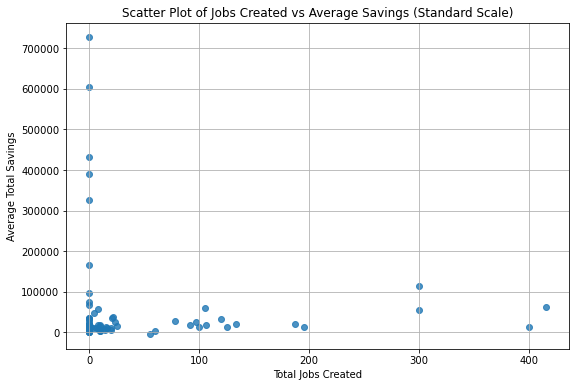

In [142]:
plt.figure(figsize=(9, 6))
plt.scatter(result['Job created'], result['Total Savings'], alpha=.8)
plt.xlabel('Total Jobs Created')
plt.ylabel('Average Total Savings')
plt.title('Scatter Plot of Jobs Created vs Average Savings (Standard Scale)')
plt.grid(True)
plt.show()

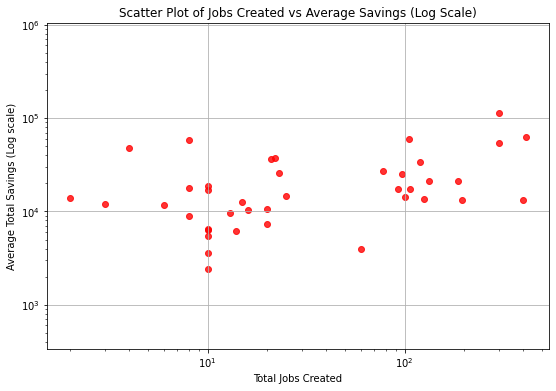

In [233]:
plt.figure(figsize=(9, 6))
plt.scatter(result['Job created'], result['Total Savings'], alpha=.8, c ='red')
plt.xlabel('Total Jobs Created')
plt.ylabel('Average Total Savings (Log scale)')
plt.title('Scatter Plot of Jobs Created vs Average Savings (Log Scale)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

**Histogram of the log of the average total savings.**

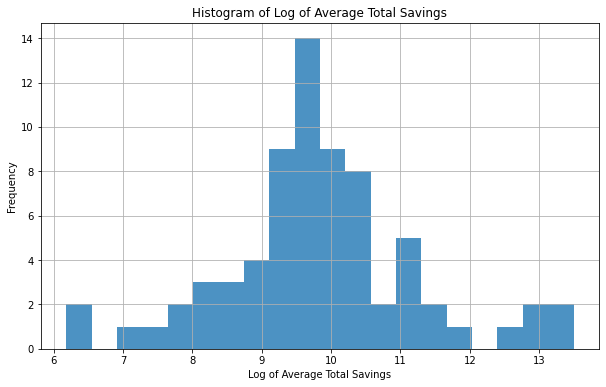

In [228]:
plt.figure(figsize=(10, 6))
log_avg_savings = np.log1p(result['Total Savings'])
plt.hist(log_avg_savings, bins=20, alpha=.8)
plt.xlabel('Log of Average Total Savings')
plt.ylabel('Frequency')
plt.title('Histogram of Log of Average Total Savings')
plt.grid(True)
plt.show()

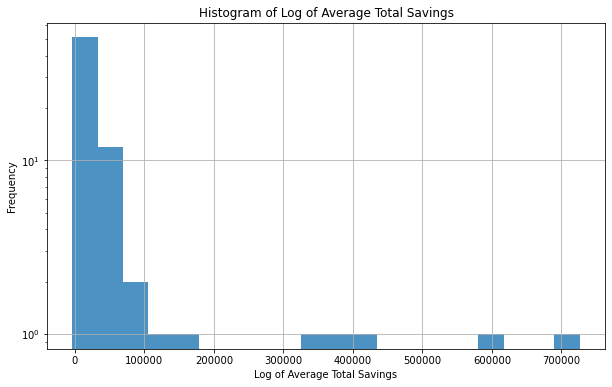

In [229]:
# plt.figure(figsize=(10, 6))
# plt.hist(result['Total Savings'], bins=20, alpha=.8, log = True)
# plt.xlabel('Log of Average Total Savings')
# plt.ylabel('Frequency')
# plt.title('Histogram of Log of Average Total Savings')
# plt.grid(True)
# plt.show()

**Line plot of the total jobs created for each month.**

In [201]:
df['Effective Date'] = pd.to_datetime(df['Effective Date'])
df.dtypes

Period                                               object
Company Name                                         object
company contact                                      object
company email                                        object
company phone                                        object
Address                                              object
City                                                 object
State                                                object
Postcode                                              int64
Industry                                             object
Industry descr                                       object
Company Type                                         object
Current fulltime                                    float64
Job created                                         float64
Job retain                                          float64
Effective Date                               datetime64[ns]
Total Savings                           

In [202]:
df['Month'] = df['Effective Date'].dt.month

In [203]:
monthly_jobs = df.groupby('Month')['Job created'].sum()
monthly_jobs

Month
1       235.0
2       695.0
3       311.0
4       171.0
5     11470.0
6       626.0
7       199.0
8       127.0
9       440.0
10      583.0
11      257.0
12      168.0
Name: Job created, dtype: float64

In [193]:
#df.set_index('Effective Date', inplace= True)
#df['Job created'].resample('M').sum()

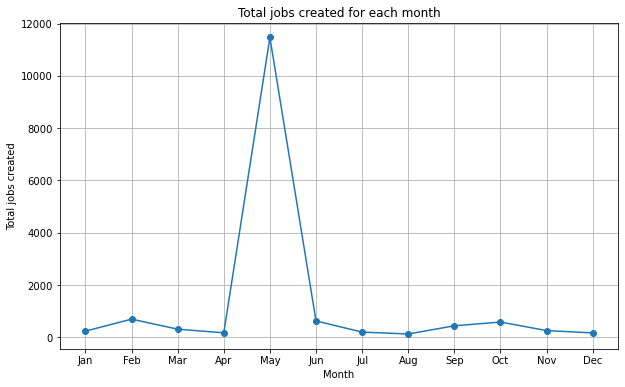

In [210]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_jobs.index, monthly_jobs.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total jobs created')
plt.title('Total jobs created for each month')
plt.xticks(monthly_jobs.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [1]:
#plt.style.available
# plt.style.use('')

# color = '', marker= '' , linestyle= '', label = '', linewidth= ''
#plt.savefig()